In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
# from sklearn.xgboost import XGBRegressor
#from sklearn.catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV


In [4]:
df=pd.read_csv("stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(["math_score"],axis=1)
Y=df["math_score"]

In [15]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

oho=OneHotEncoder()
scaler=StandardScaler()

cat_features=[feature for feature in X.columns if X[feature].dtype=="O"]
num_features=X.select_dtypes(exclude="object").columns
preprocessor=ColumnTransformer([("one-hot",oho,cat_features),("standarscaler",scaler,num_features)])
transformed_x=preprocessor.fit_transform(X)

In [17]:
transformed_x
transformed_x.shape

(1000, 19)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(transformed_x,Y,test_size=0.2,random_state=42)

def evaluate_model(Y_preds,Y_test):
    r2=r2_score(Y_test,Y_preds)
    mse=mean_squared_error(Y_test,Y_preds)
    rmse=np.sqrt(mse)
    mae= mean_absolute_error(Y_test,Y_preds)

    return r2,mse,rmse,mae


In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    # "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_r2,model_train_mse,model_train_rmse,model_train_mae=evaluate_model(y_train_pred,Y_train)
    model_test_r2,model_test_mse,model_test_rmse,model_test_mae=evaluate_model(y_test_pred,Y_test)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7071
- Mean Absolute Error: 4.5155
- R2 Score: 0.8555
-----------------------

In [26]:
pd.DataFrame({
    "MODEL NAME":model_list,
    "R2_SCORE":r2_list
}).sort_values(by=["R2_SCORE"],ascending=False)

,MODEL NAME,R2_SCORE
2,Ridge,0.880593
0,Linear Regression,0.880433
6,AdaBoost Regressor,0.856586
5,Random Forest Regressor,0.856239
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783722
4,Decision Tree,0.726102


In [27]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


In [28]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.Collecting yellowbrick
  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 495.5 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/282.6 kB 563.7 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 722.1 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 655.8 kB/s eta 0:00:01
   --------------------------- ---------- 204.8/282.6 kB 778.2 kB/s eta 0:00:01
   --------------------------- ---------- 204.8/282.6 kB 778.2 kB/s eta 0:00:01
   --------------------------- ---------- 204.8/282.6 kB 778.2 kB/s eta 0:00:01
   -

In [35]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

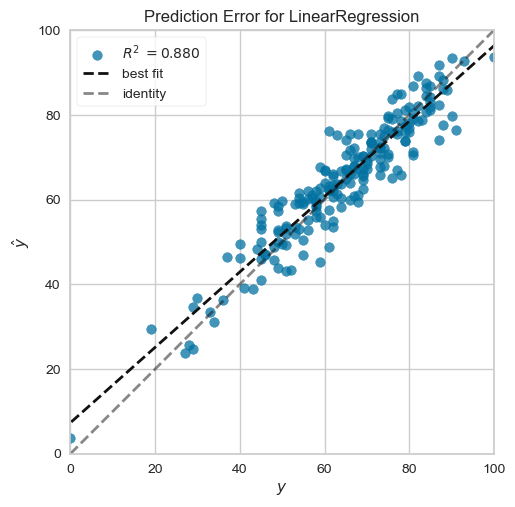

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [36]:
visualizer=PredictionError(lin_model)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.show()

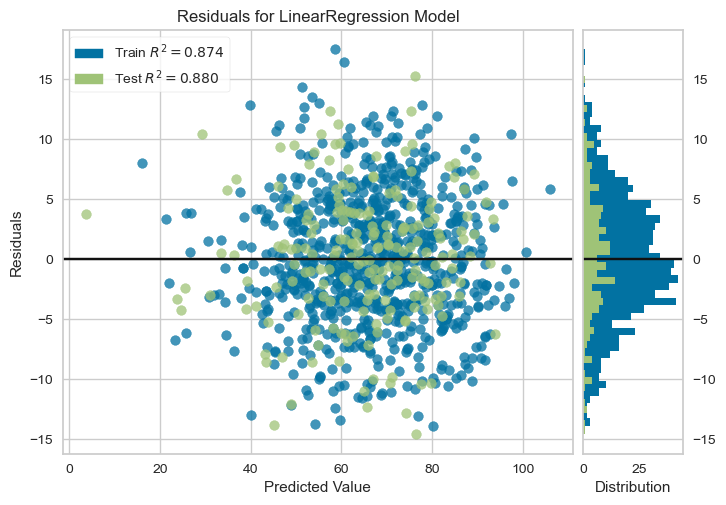

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [37]:
visualizer=ResidualsPlot(lin_model)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.show()